One sample plotting tutorial
============================

Welcome to the StarMapper tutorials. Here I will demonstrate and explain some
of the functionality of StarMapper. In this Jupyter Notebook example, we'll
explore:

* [How to set up the environment](#how-to-set-up-the-environment)
* [How to load experimental data](#how-to-load-experimental-data)
* [How to use basic plotting functions](#how-to-use-basic-plotting-functions)

Every multi-sample plotting function takes the same form:

```python
MaP.array_qc(samples, other_keywords="some_value")
MaP.array_skyline(samples, other_keywords="some_value")
MaP.array_ap(samples, other_keywords="some_value")
MaP.array_circle(samples, other_keywords="some_value")
MaP.array_ss(samples, other_keywords="some_value")
MaP.array_mol(samples, other_keywords="some_value")
MaP.array_disthist(samples, other_keywords="some_value")
MaP.array_heatmap(samples, other_keywords="some_value")
MaP.array_linreg(samples, other_keywords="some_value")
```

We'll dive into how to use these and what some of the other_keywords are.

Notebook set-up
---------------
First, lets set up our Jupyter Notebook, and import StarMapper.

Let's also create a button to hide/show the raw code, this can be useful to
include if you are going to share an analysis with an audience that is not
interested in the code.

In [2]:
%matplotlib inline
import starmapper as MaP

MaP.create_code_button()

Initializing MaP sample
-----------------------
In this example, all of my files for a particular sample have the same prefix,
and are included in the same directory. This allows me to make a simple
function to create each sample. This function takes a sample prefix, prepends
the path, and appends the file suffix for each data type.

These particular samples are using different probing reagents to determine which
is working best for correlation analyses. The differences between them will be
subtle, but important.

In [3]:
path = 'data/'
def init_sample(sample):
    return MaP.Sample(sample       = sample,
                      log          = f"{path}{sample}_shapemapper_log.txt",
                      profile      = f"{path}{sample}_rnasep_profile.txt",
                      rings        = f"{path}{sample}-rnasep.corrs",
                      pairs        = f"{path}{sample}-rnasep-pairmap.txt",
                      dance_prefix = f"{path}{sample}_rnasep",
                      deletions    = f"{path}example-rnasep-deletions.txt",
                      fasta        = f"{path}RNaseP-noSC.fasta",
                      ct           = f"{path}RNaseP.ct",
                      ss           = f"{path}RC_CRYSTAL_STRUCTURE.xrna",
                      pdb          = f"{path}3dhs_Correct.pdb",
                      pdb_kwargs   = {"chain":"A"})

example1 = init_sample("example1")
example2 = init_sample("example2")
example3 = init_sample("example3")
example4 = init_sample("example4")

In [4]:
samples = [example1, example2, example3, example4]

ShapeMapper QC
--------------

The first step in any thorough analysis is quality control, so lets check the
quality of our samples against each other. In contrast to the single sample QC
plot, this one splits up untreated and modified samples.

In this plot we can see that each experiment's modified sample is shifted to the
right compared to the untreated samples, but to different degrees.

All of our samples have a good read-length distribution, and all of them have
a good shift in the distribution of per-nucleotide mutation rates.

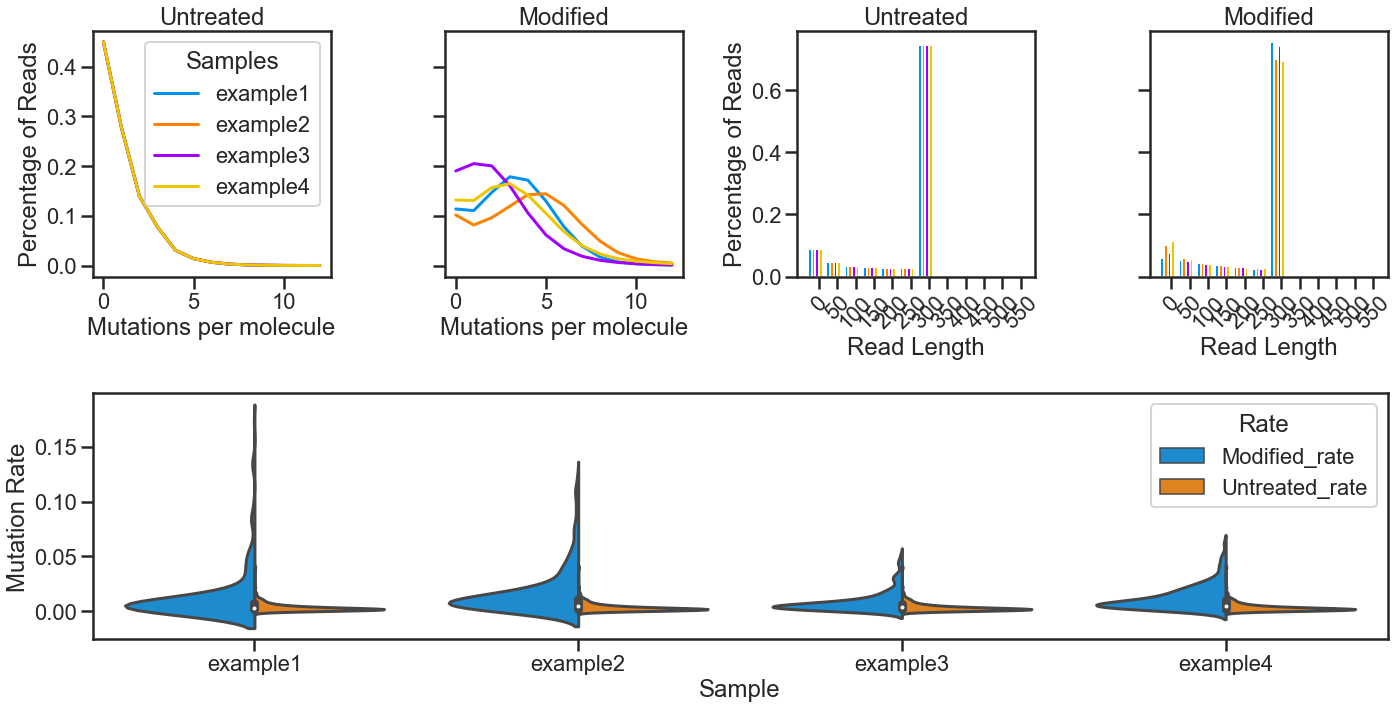

In [5]:
MaP.array_qc(samples);

Skyline Plots
-------------

We can see that the signal magnitude is slightly different in each of our
samples, but to see how they differ qualitatively, we should plot them in detail
on the same axis. Skyline plots are the best way to show this.

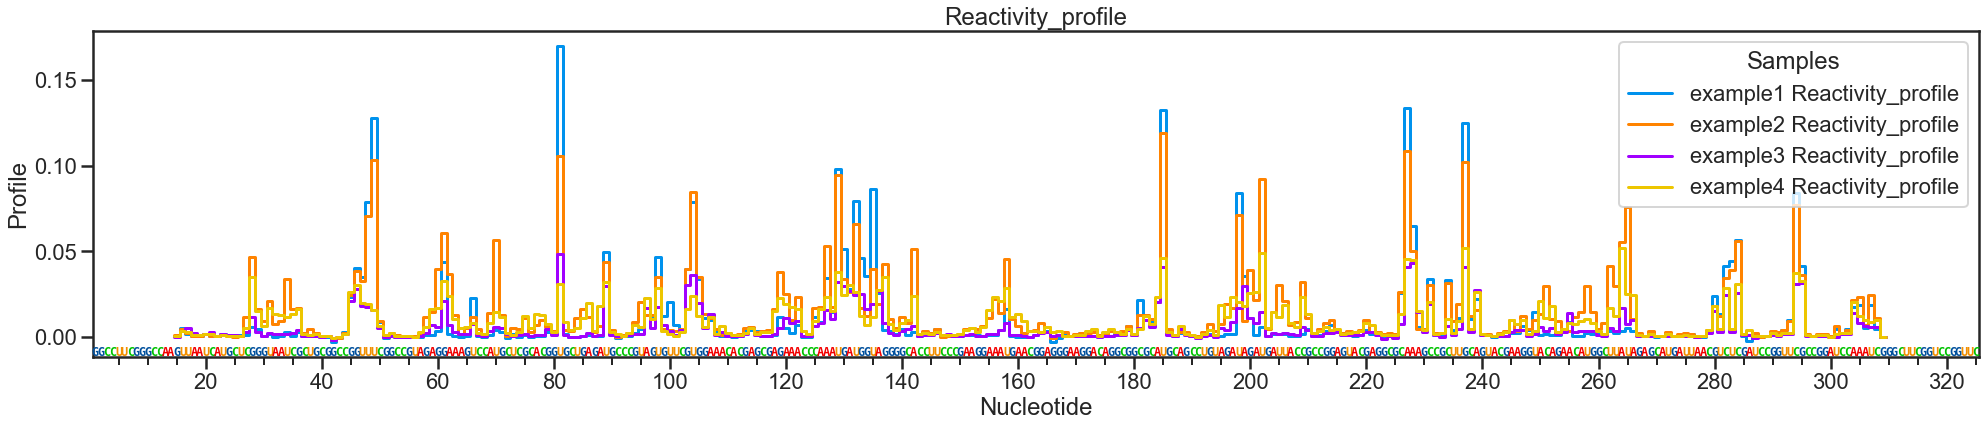

In [6]:
MaP.array_skyline(samples);

By default, skyline plots the "Reactivity_profile" data, but clearly these have
different magnitudes. We want to view the normalized profiles, which we can
specify with the keyword `columns="Norm_profile"`. For the most part, these
samples are very similar, but they do have some interesting differences. Some
regions in examples 2-4 have reactivity in regions where example 1 does not.

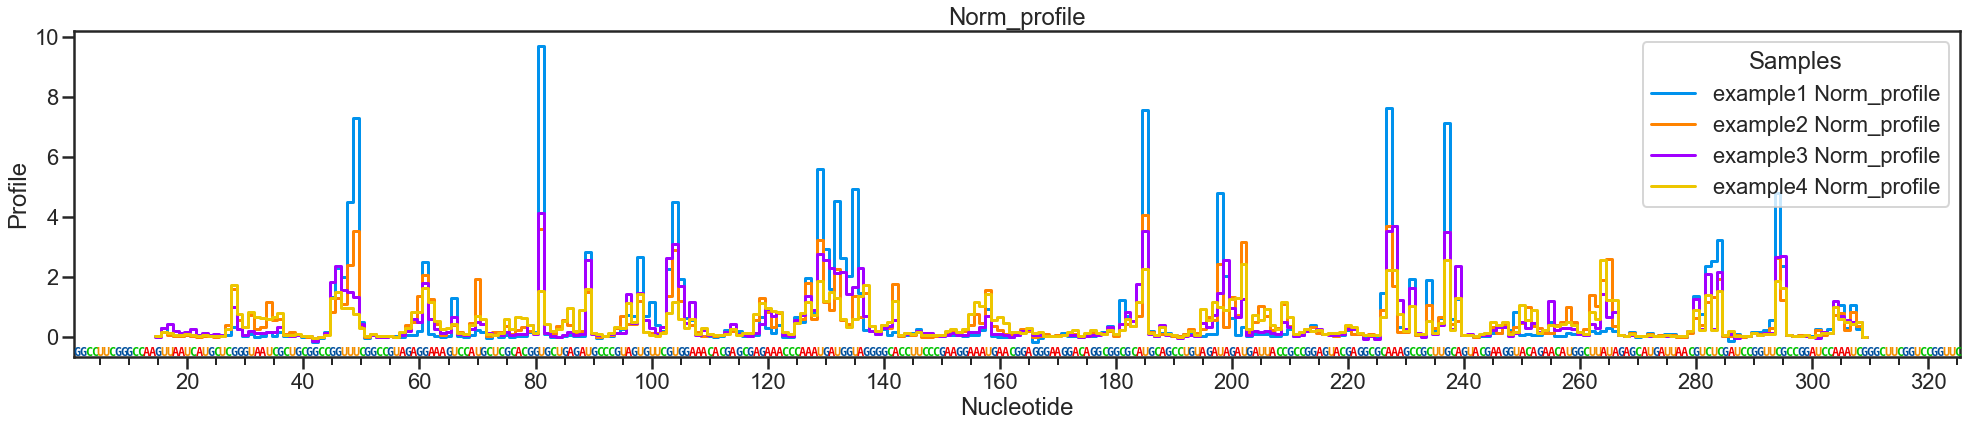

In [7]:
MaP.array_skyline(samples, columns="Norm_profile")

Linear regressions
------------------

Another good way to compare reagents is by simple linear regression.

If a structure is provided, we can color the points on the scatter plot by
their base-pairing status. We can also get KDE curves (density curves similar to
histograms) for paired and unpaired nucleotides, to see how well our reagents
report on base-pairing. These reagents are doing pretty well. As we can see by
the pairwise R-squared values, the profiles are indeed quite different.
Typical replicate experiment R-squared values are typically greater than 0.9.

C:\Users\psirv\OneDrive - University of North Carolina at Chapel Hill\GitHub\JNBTools\starmapper\plots\linreg.py:79: RuntimeWarning: invalid value encountered in greater
  valid = profile > 0
C:\Users\psirv\OneDrive - University of North Carolina at Chapel Hill\GitHub\JNBTools\starmapper\plots\linreg.py:79: RuntimeWarning: invalid value encountered in greater
  valid = profile > 0
C:\Users\psirv\OneDrive - University of North Carolina at Chapel Hill\GitHub\JNBTools\starmapper\plots\linreg.py:79: RuntimeWarning: invalid value encountered in greater
  valid = profile > 0
C:\Users\psirv\OneDrive - University of North Carolina at Chapel Hill\GitHub\JNBTools\starmapper\plots\linreg.py:79: RuntimeWarning: invalid value encountered in greater
  valid = profile > 0


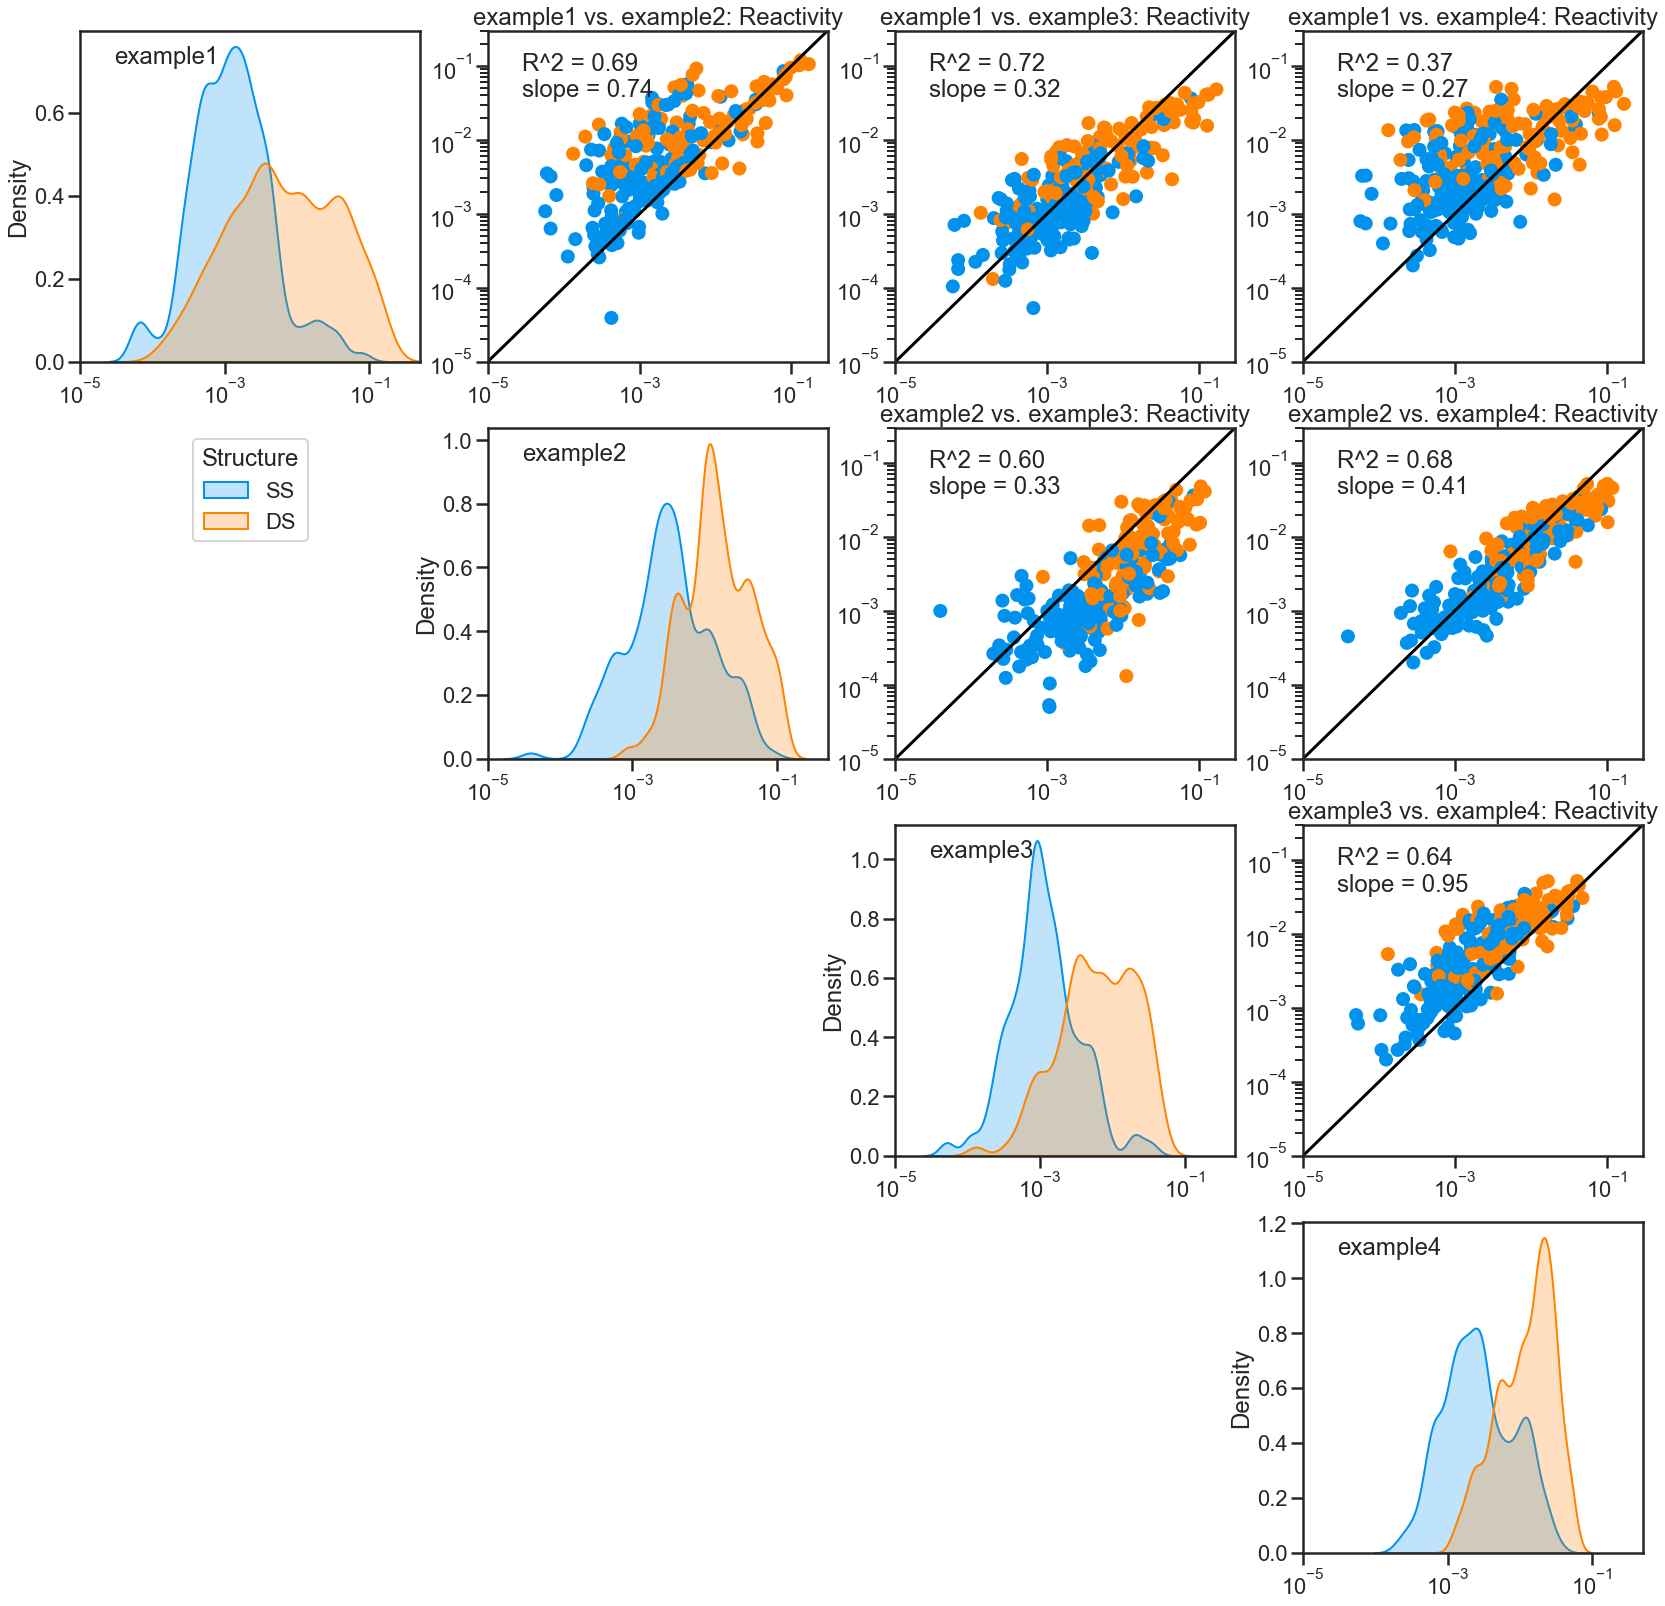

In [23]:
MaP.array_linreg(samples, colorby="structure");

Arc Plots
---------

Where these reagents really differ is in the degree in which their correlations
detect base-pairing and tertiary structure. A good way to show this is plotting
PAIR-MaP and RING-MaP data together. First we'll filter the RINGs to be positive,
highly correlated, and distant in secondary structure.

Examples 1 and 4 are a bit messy. Example 2 picks up on an important loop-loop
interaction, but misses many of the long-range base-pairs. Example 3 reveals
the long-range pseudoknot well, but doesn't strongly report on tertiary
structure.


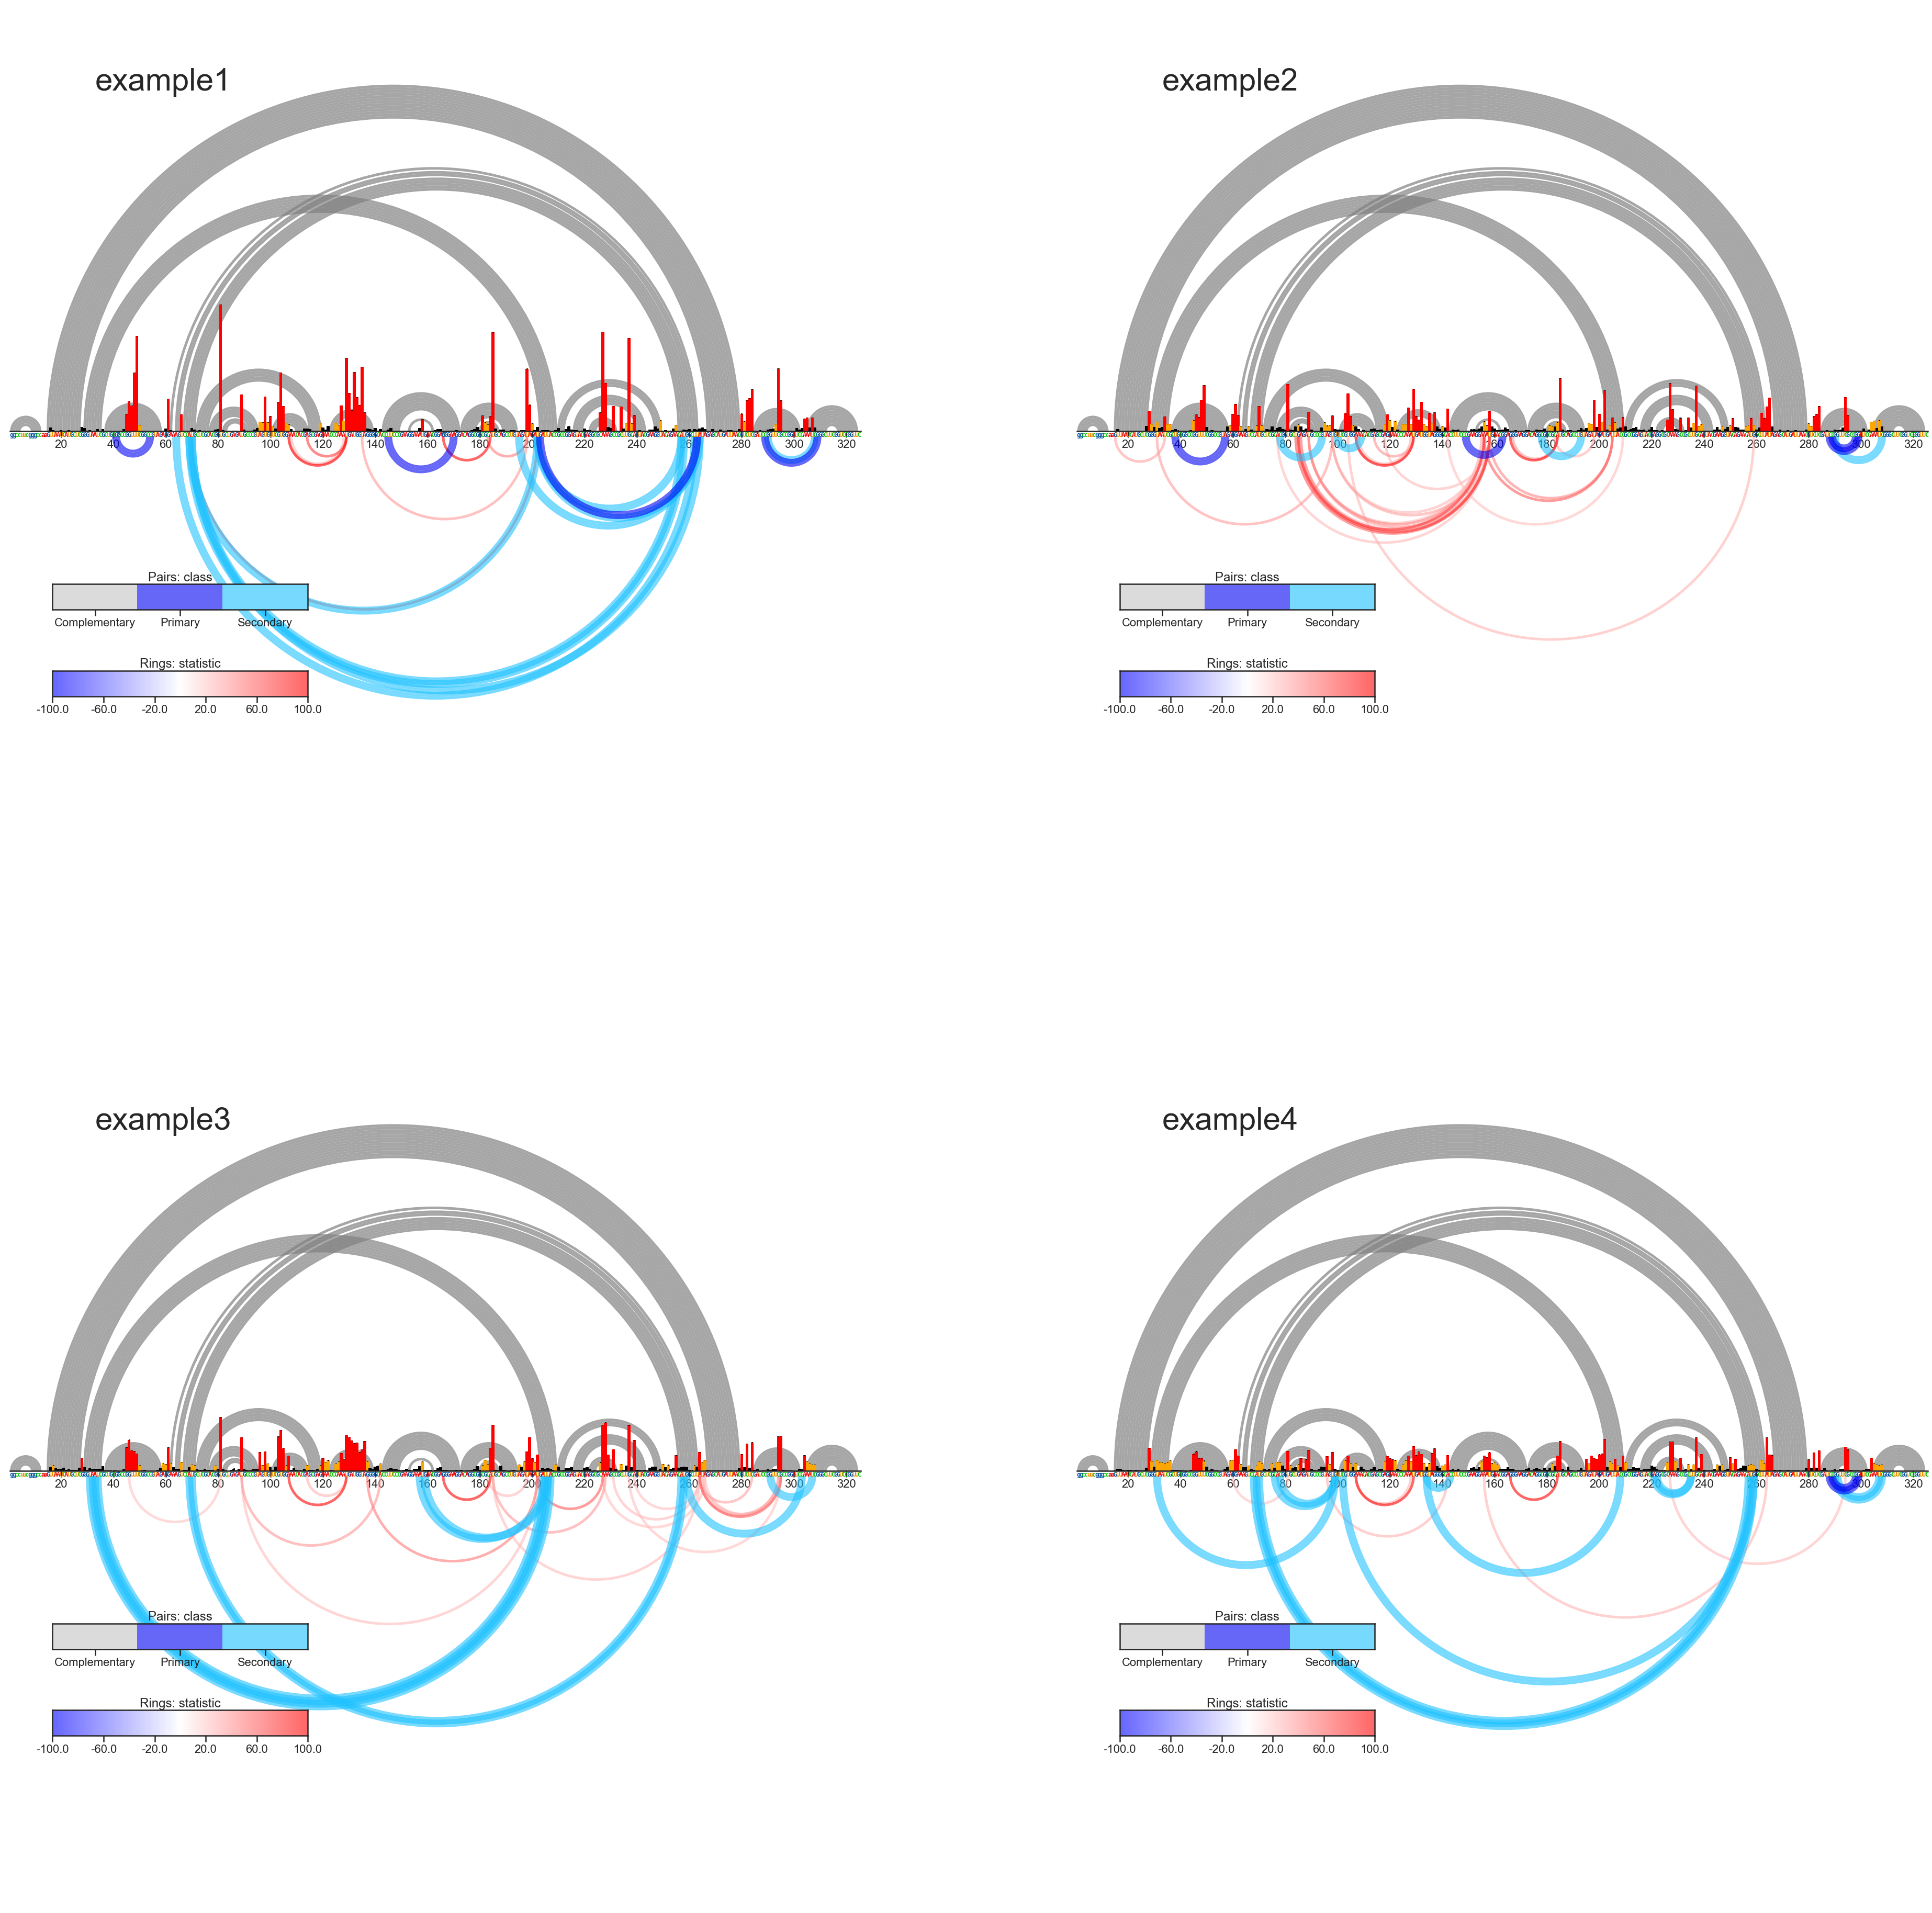

In [10]:
MaP.array_ap(samples, ij="rings", positive_only=True, Statistic_ge=23,
             cdAbove=14, ij2="pairs")


Circle plots
------------

The same data can be displayed on circle plots, but these plots are best used
to compare a single data type at a time, as they can become cluttered quickly.

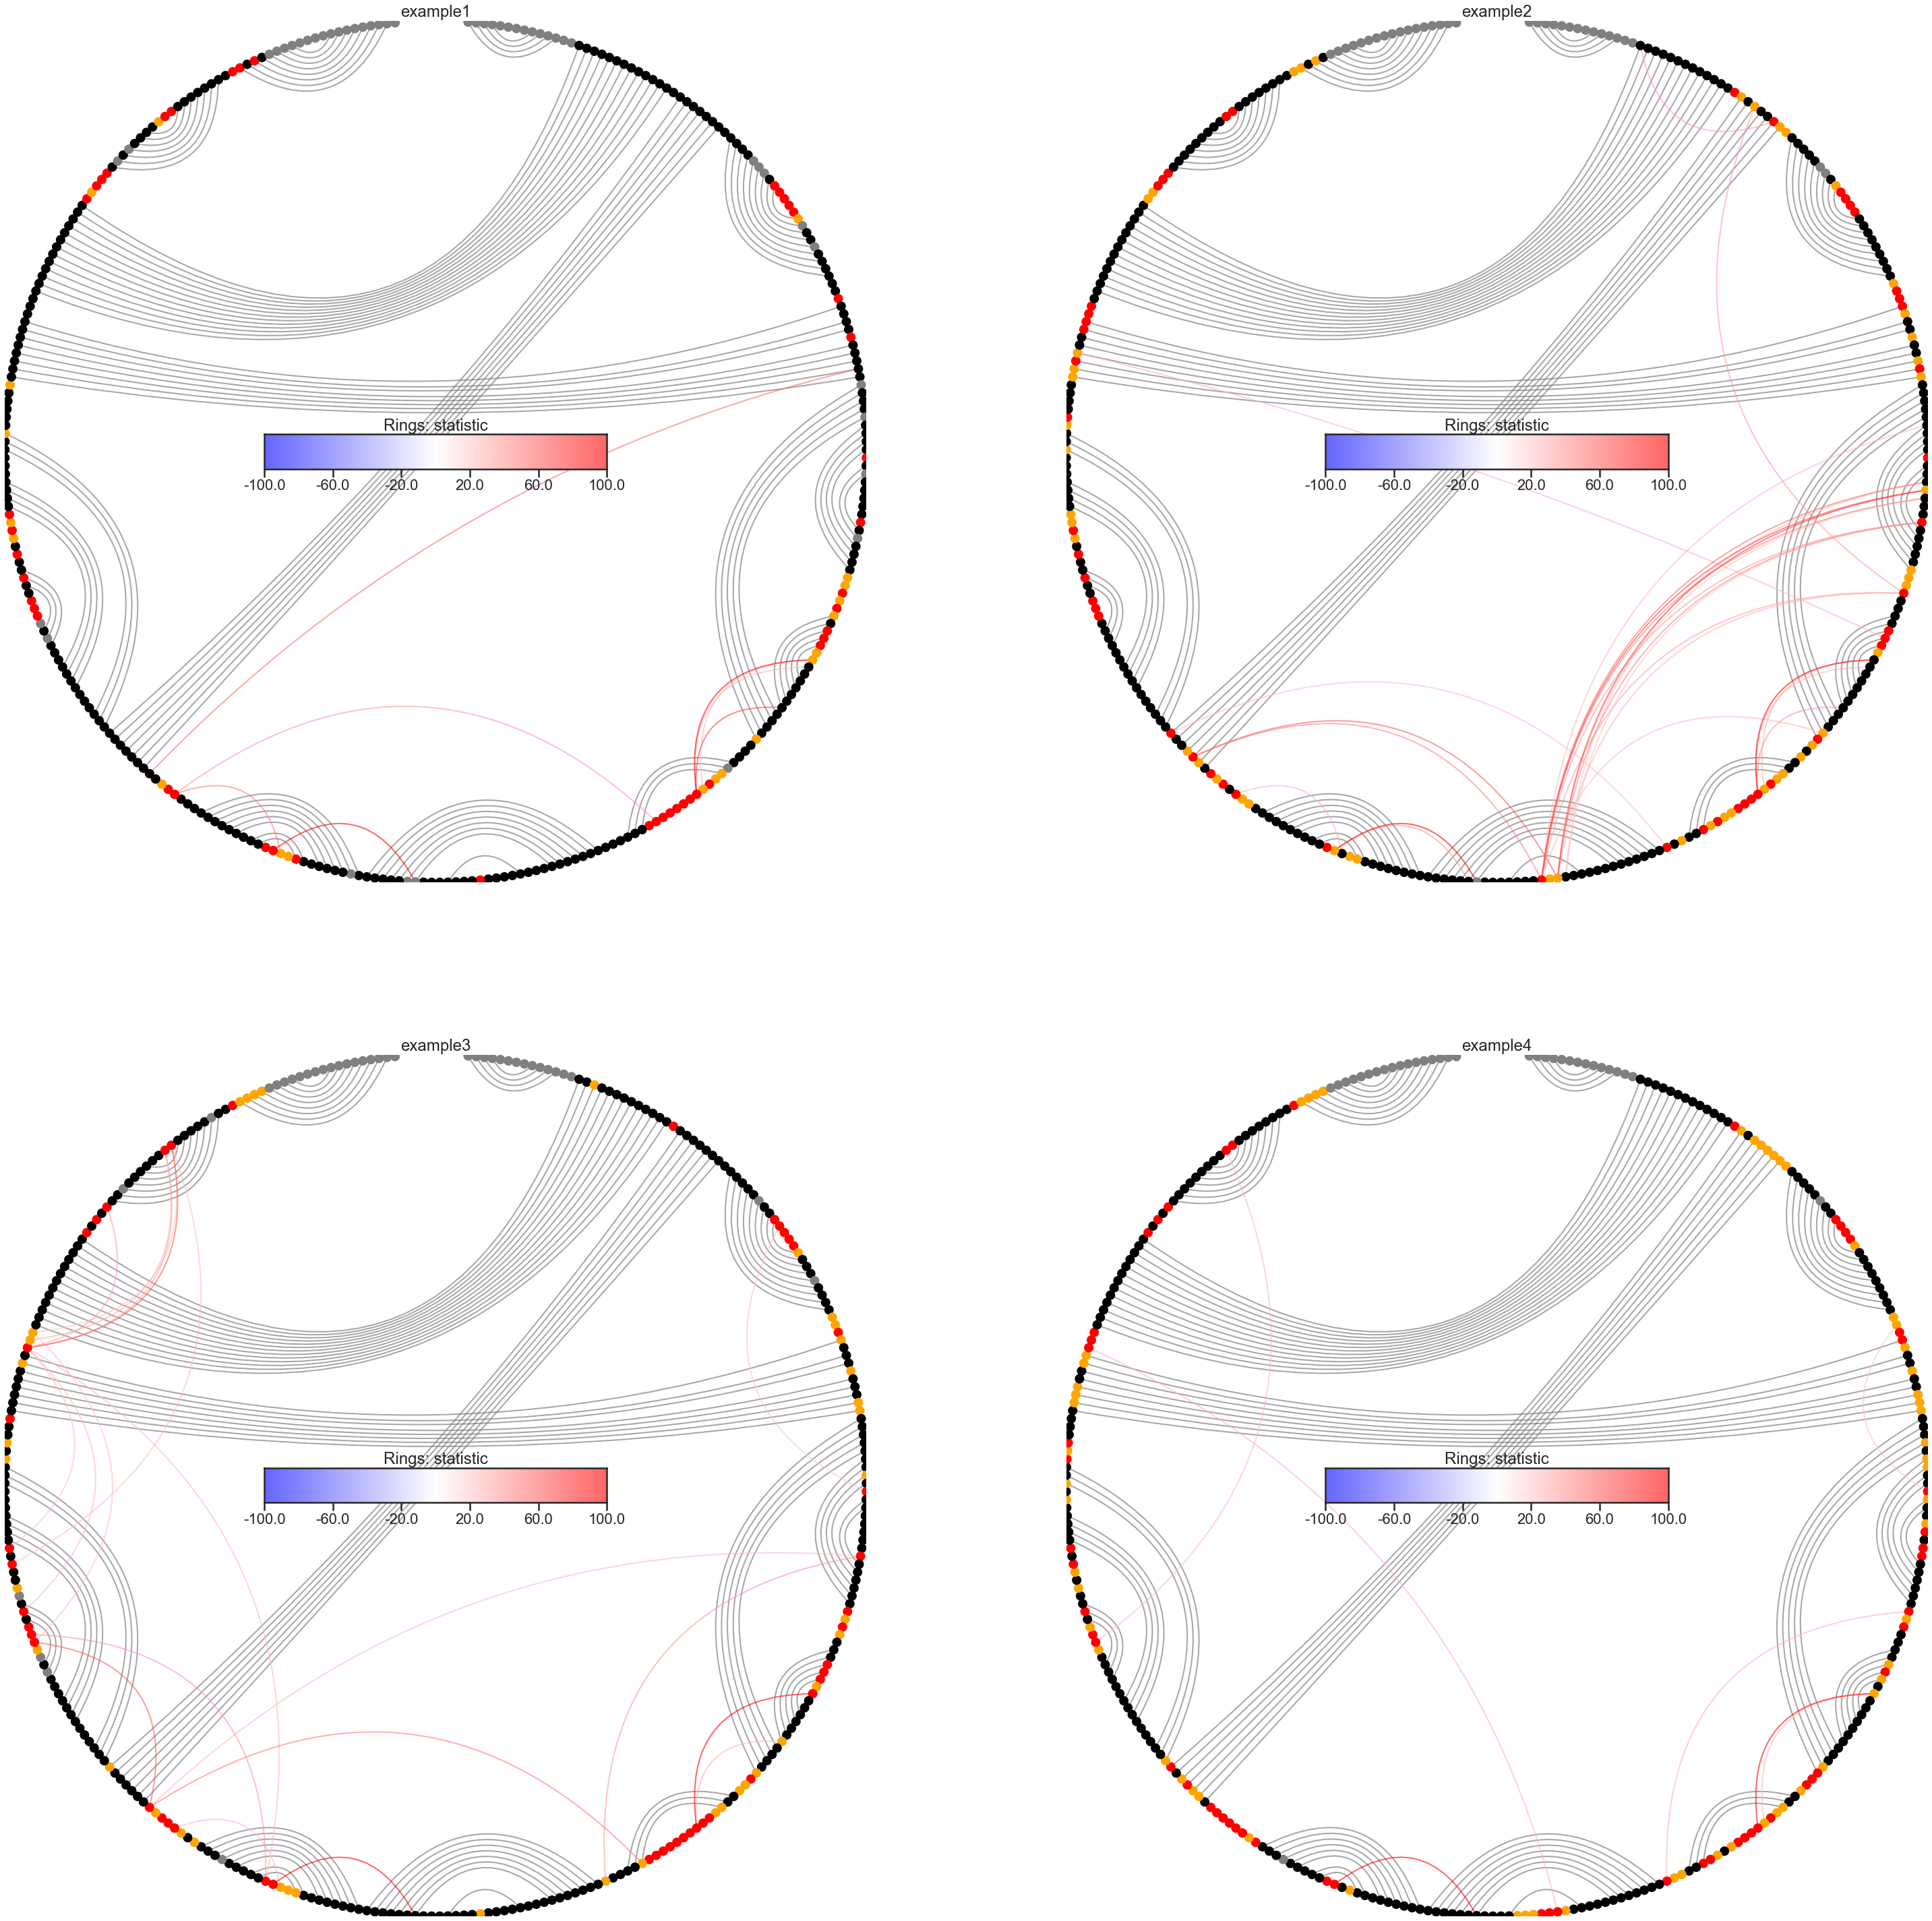

In [14]:
MaP.array_circle(samples, ij="rings", positive_only=True, Statistic_ge=23,
             cdAbove=14, ct="ct", profile="profile")

Secondary structure drawings
----------------------------

Also included in our samples is a custom secondary structure drawing. This
particular drawing is laid out to reflect the tertiary elements of this RNA,
namely, coaxially stacked helices with a complex core motif.

We can view all of the above data on these drawings as well. Here we will only
display the PAIRs that reflect base-pairing in this structure by applying the
filter `paired_only=True`.

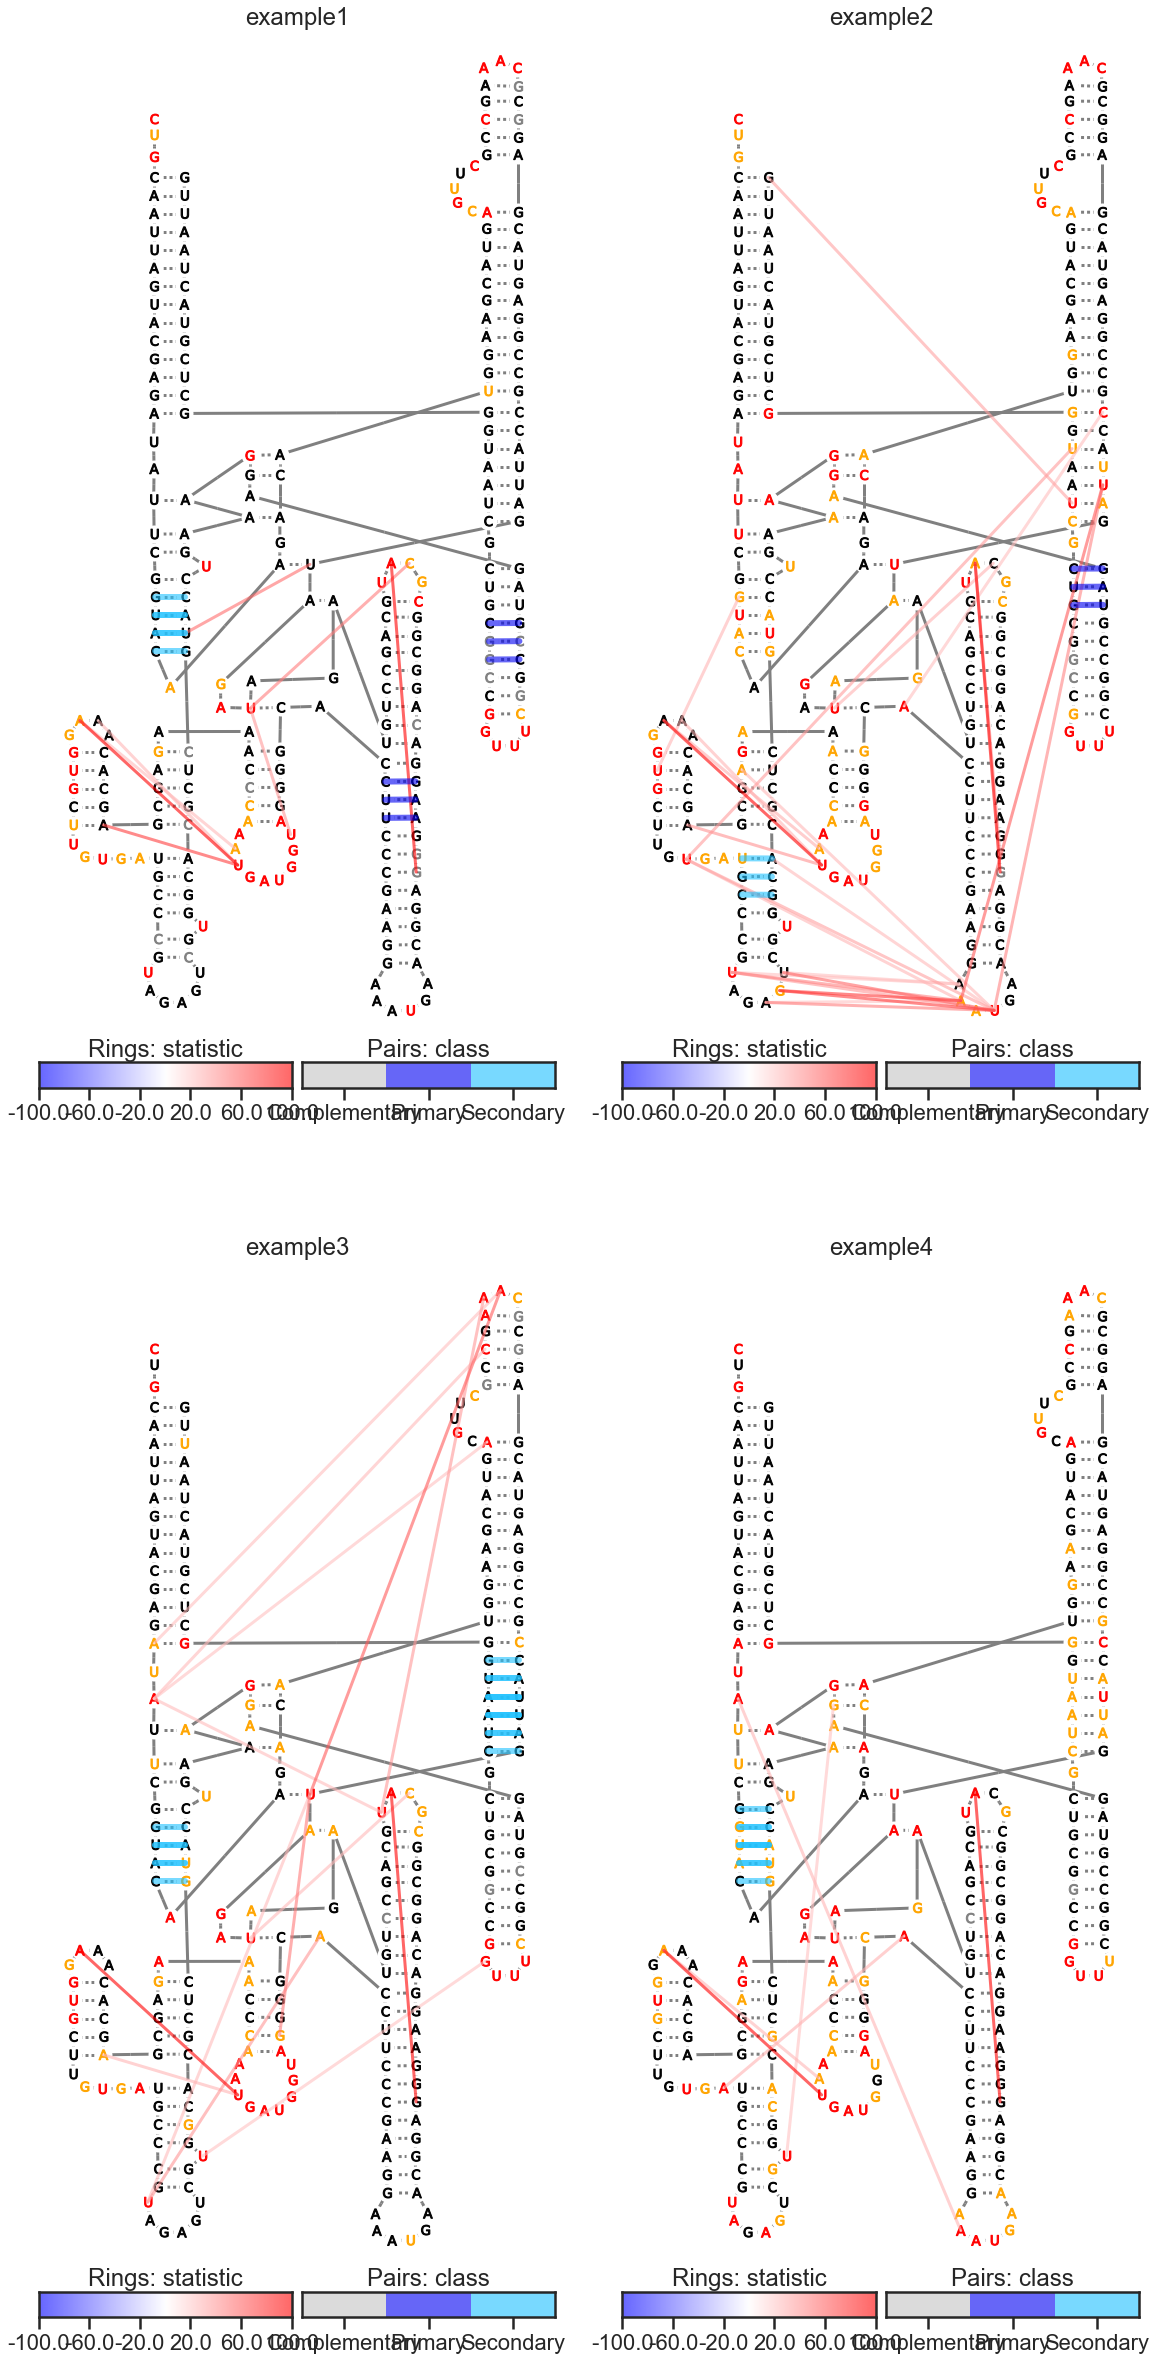

In [17]:
MaP.array_ss(samples, ij="rings", positive_only=True, Statistic_ge=23,
             cdAbove=14, colors="profile", apply_color_to="sequence",
             ij2="pairs", ij2_filter={"paired_only":True})


3D structures
-------------

Finally, we can view this data on the crystal structure of this RNA.

Ideally, these correlations would report on nucleotides that are close in 3D
distance. Clearly, that is not the case for these reagents. Sad.

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

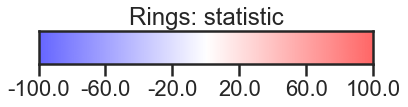

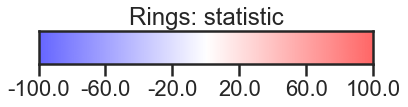

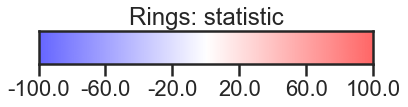

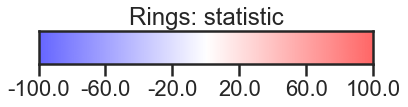

In [20]:
MaP.array_mol(samples, ij="rings", positive_only=True, Statistic_ge=23,
             cdAbove=14, nt_color="grey")

Distance histograms
-------------------

To finally prove to myself that these are not performing well, lets compare the
distances between nucleotides that are correlated to the pairwise distances of
all nucleotides in this crystal structure.

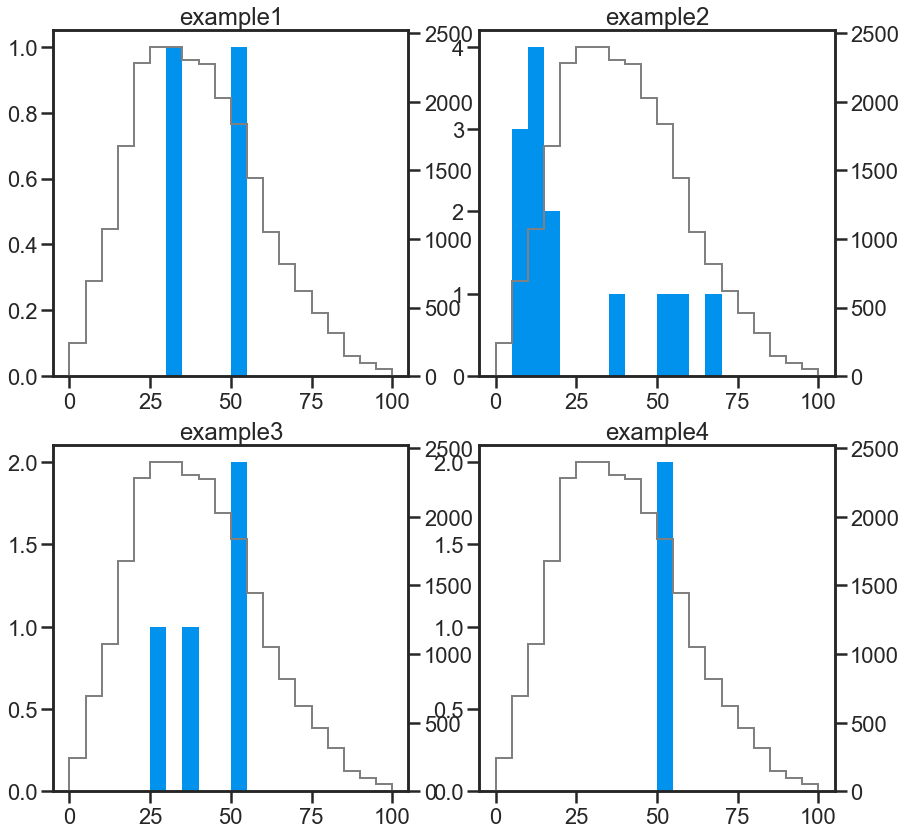

In [30]:
MaP.array_disthist(samples, structure="pdb", ij="rings", positive_only=True, Zij_ge=2,
                   cdAbove=14)

To see how a good experiment performs on this metric, lets compare a SHAPE-JuMP
experiment.

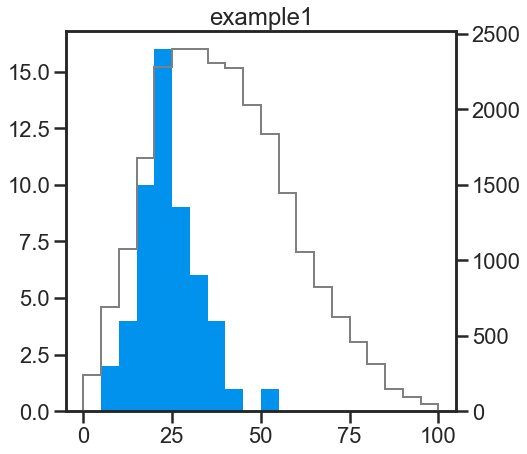

In [28]:
MaP.array_disthist(samples[0:1], structure="pdb", ij="deletions", Percentile_ge=0.99)
